In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_17948\781345070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('housing.csv')
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


data exploration

In [4]:
data.dropna(inplace=True) # drop missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = data.drop('median_house_value', axis=1) # axis = 1 means drop column
y = data['median_house_value'] # only the target variable

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training, 20% testing 
# random_state is the seed for the random number generator 

In [11]:
train_data = pd.concat([x_train, y_train], axis=1) # concatenate the training data
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

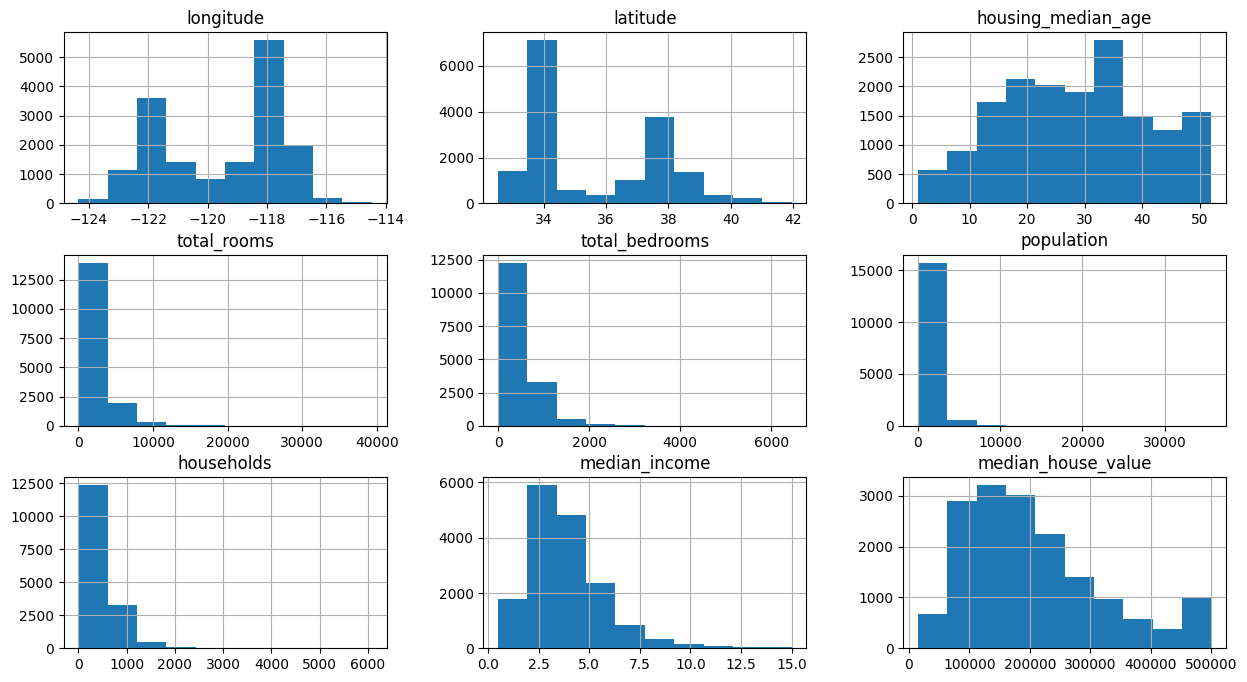

In [12]:
train_data.hist(figsize=(15,8)) # plot histograms of the training data

In [13]:
# One-hot encoding
train_data_encoded = pd.get_dummies(train_data) 
# This will convert all the categorical variables into one-hot encoded variables
# For example, ocean_proximity will be converted into 5 columns, one for each category and a column to indicate if the value is missing (Nan).

# or we use this 
# train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1) # join the one-hot encoded columns to the original data

# Now calculate the correlation
train_data_encoded.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166,0.318704,-0.050463,0.008492,-0.475731,0.046118
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933,-0.445040,0.347245,-0.014571,0.360561,-0.161338
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041,0.043953,-0.235569,0.016215,0.255591,0.019654
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040,-0.004589,0.024758,-0.005975,-0.019720,-0.008668
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352,0.019935,-0.009414,-0.002512,-0.019040,0.001575
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989,0.073940,-0.022369,-0.008305,-0.058497,-0.023004
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598,0.044033,-0.041926,-0.006820,-0.009957,0.002544
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695,0.163376,-0.234058,-0.009245,0.063391,0.022947
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000,0.258017,-0.482445,0.027272,0.158891,0.135367
ocean_proximity_<1H OCEAN,0.318704,-0.445040,0.043953,-0.004589,0.019935,0.073940,0.044033,0.163376,0.258017,1.000000,-0.604592,-0.012067,-0.317411,-0.343274


In [14]:
train_data.head()
#I want to drop the ocean_proximity column
train_data = train_data.drop('ocean_proximity', axis=1)


In [15]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


<Axes: >

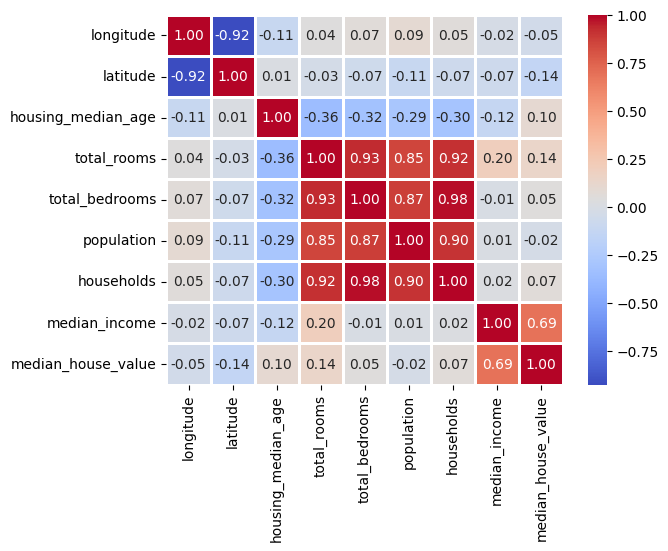

In [16]:
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
#explain each parameter
#annot=True means that the values will be displayed on the heatmap
#cmap='coolwarm' is the color map
#fmt='.2f' is the number of decimal places
#linewidths=2 is the width of the lines that will divide each cell


<Axes: >

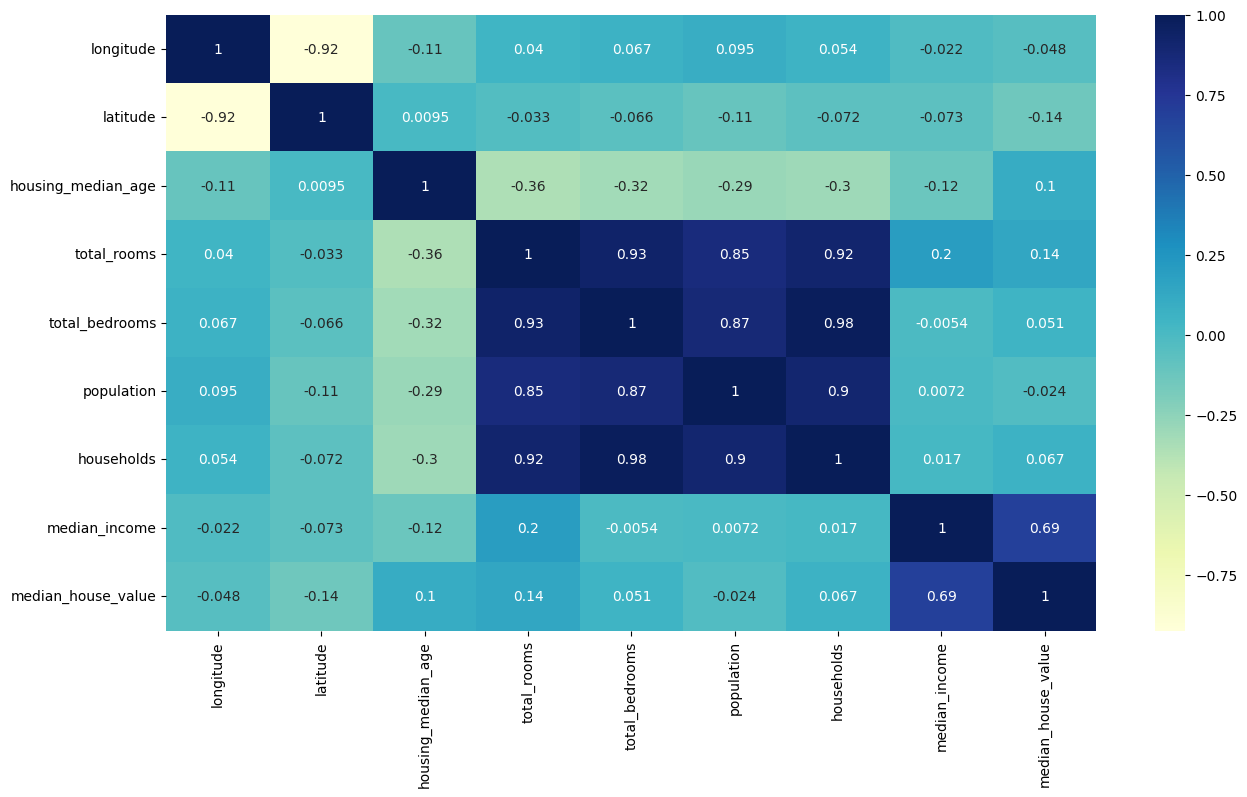

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

it seams that the median house value is highly correlated with the median income


data preprocessing


In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) 
# explain why
# The log transformation is used to make the data more normal.
# The +1 is used to avoid division by zero.
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

#  in order to make the data more normal (gaussian bell curve) 
# we can use the log transformation





array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

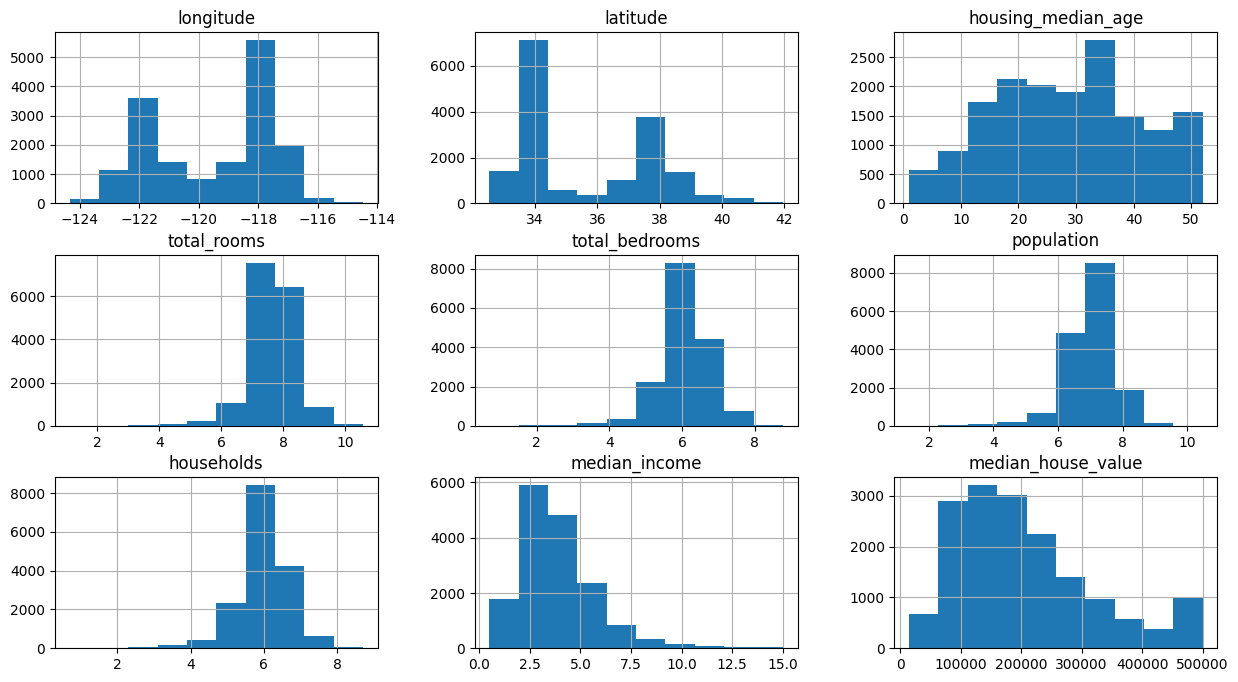

In [19]:
train_data.hist(figsize=(15,8))

In [20]:
train_data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,False,False,False,False,True


<Axes: >

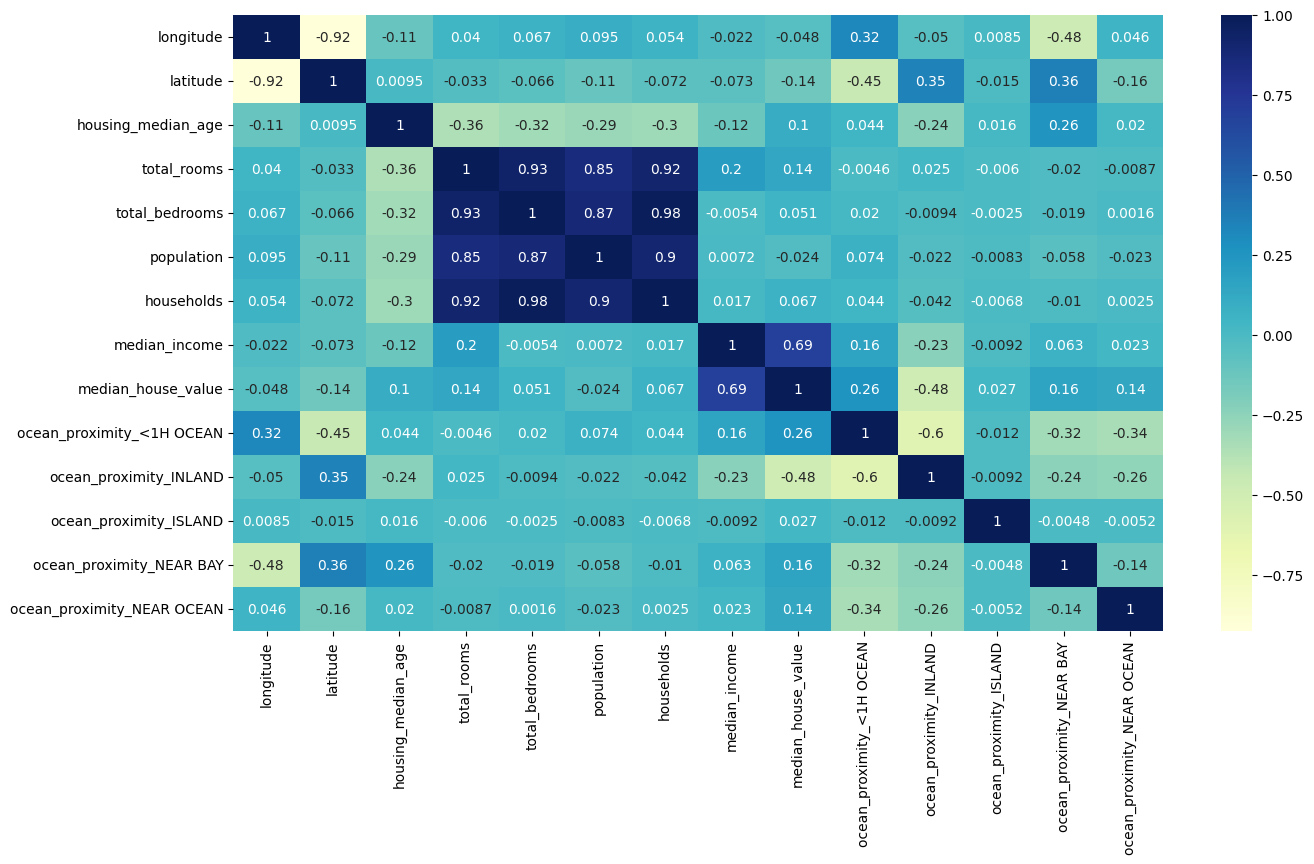

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(), annot=True, cmap='YlGnBu')

Text(0.5, 1.0, 'Latitude vs Longitude')

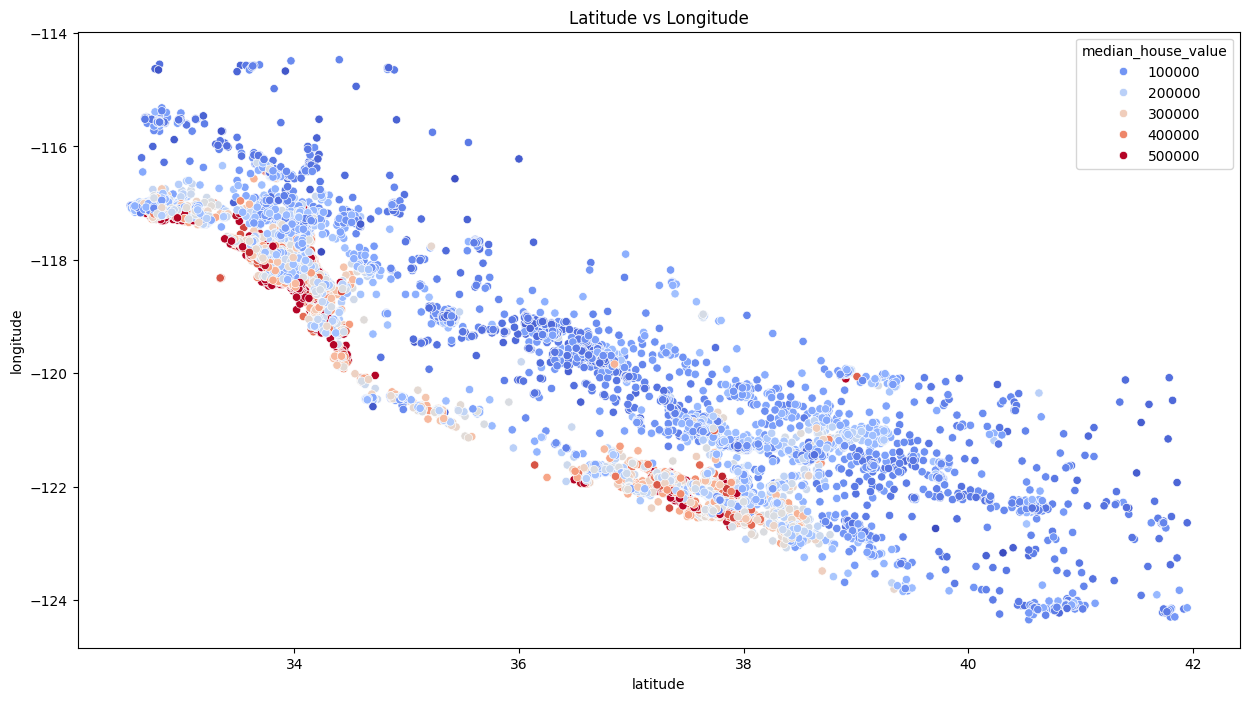

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data_encoded, hue='median_house_value', palette='coolwarm')
plt.title('Latitude vs Longitude')

#explain why and what is the meaning of the plot
#The scatter plot shows the relationship between latitude and longitude. The color of the points represents the median house value.
#We can see that the median house value is higher in certain areas. For example, the median house price for the area "NorthEast" is much higher than
#the median house price for the area "North".



feature engineering

In [23]:
train_data_encoded['bedroom_ratio'] = train_data_encoded['total_bedrooms'] / train_data_encoded['total_rooms']
train_data_encoded['household_rooms'] = train_data_encoded['total_rooms'] / train_data_encoded['households']
# explain why
# The bedroom ratio is the number of bedrooms per room. The household rooms is the number of rooms per household.
# These new features can help the model to better understand the data.


<Axes: >

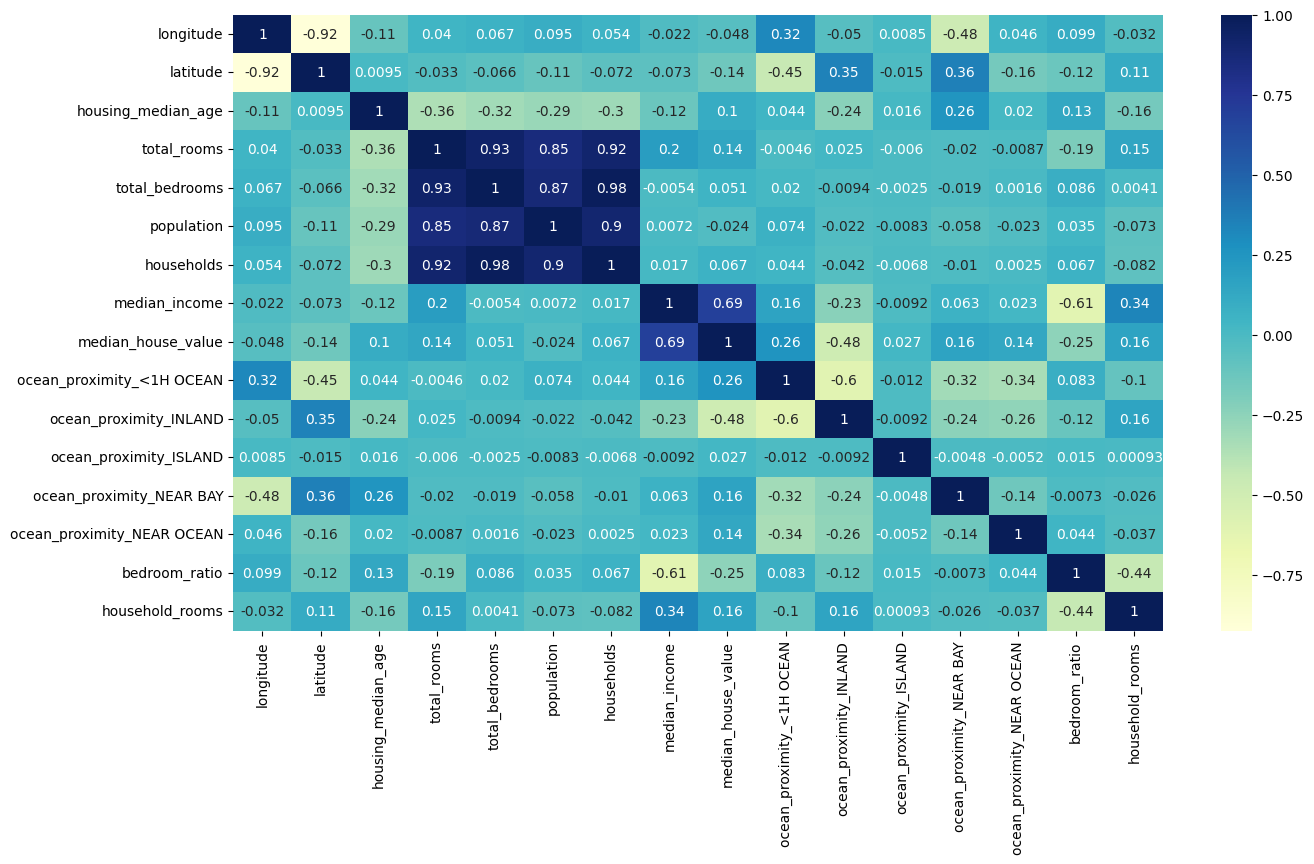

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(), annot=True, cmap='YlGnBu')

simple linear regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import StandardScaler

x_train , y_train = train_data_encoded.drop('median_house_value', axis=1), train_data_encoded['median_house_value']
scaler = StandardScaler() # create a scaler object
# why we scale the data
# The scaler object is used to scale the data. Scaling the data is important because it can improve the performance of the model.
# The standard scaler scales the data to have a mean of 0 and a standard deviation of 1.


reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the model to training data (x_train, y_train).


LinearRegression()

In [26]:
test_data = pd.concat([x_train, y_train], axis=1) # concatenate the testing data
test_data.head()

# Splitting the dataset into features and target variable


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,True,False,False,False,False,0.209429,4.951740,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,False,True,False,False,False,0.174710,5.954023,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,False,True,False,False,False,0.217939,5.126482,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,True,False,False,False,False,0.401778,2.642058,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,False,False,False,False,True,0.213159,4.551980,214600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

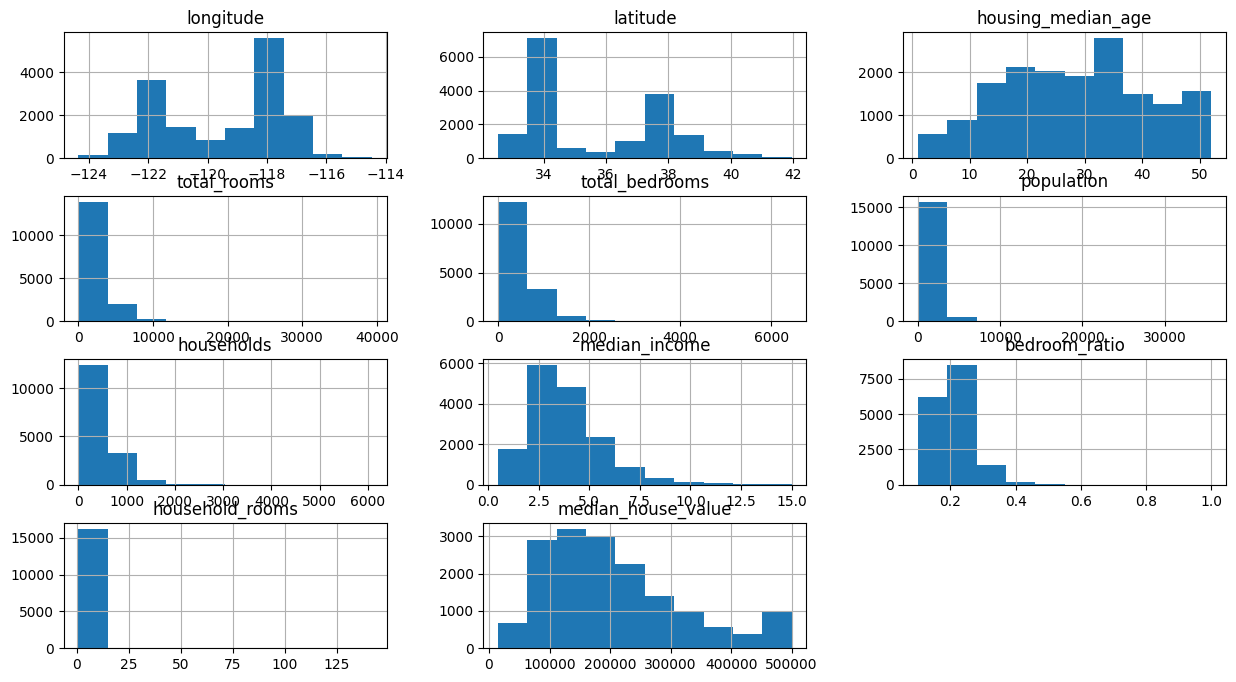

In [27]:
test_data.hist(figsize=(15,8))

In [28]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
# Average values of the predictors (used for imputing missing values).

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

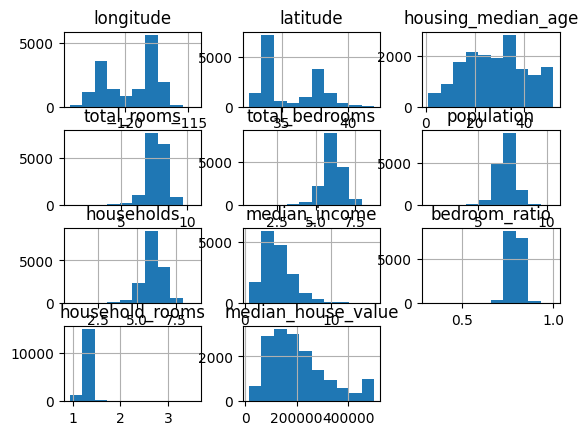

In [29]:
test_data.hist()

In [30]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,True,False,False,False,False,0.813816,1.235350,227600.0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,False,True,False,False,False,0.749416,1.344506,110400.0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,False,True,False,False,False,0.815812,1.246236,248100.0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,True,False,False,False,False,0.882690,1.142841,305600.0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,False,False,False,False,True,0.794652,1.252109,214600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,True,False,False,False,False,0.776717,1.308200,273400.0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,True,False,False,False,False,0.800481,1.255281,160800.0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,True,False,False,False,False,0.801871,1.251124,335400.0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,False,False,False,True,False,0.805704,1.242326,231200.0


In [31]:
train_data_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,True,False,False,False,False,0.209429,4.951740
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,False,True,False,False,False,0.174710,5.954023
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,False,True,False,False,False,0.217939,5.126482
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,True,False,False,False,False,0.401778,2.642058
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,False,False,False,False,True,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,True,False,False,False,False,0.167168,6.602649
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,True,False,False,False,False,0.177044,5.840160
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,True,False,False,False,False,0.231493,4.403315
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,False,False,False,True,False,0.186047,5.410596


In [32]:
reg.score(x_train, y_train) # R^2 value
#explain this in detail
#The R^2 value is a measure of how well the model fits the data. It ranges from 0 to 1, where 1 means that the model fits the data perfectly.
#In this case, the R^2 value is 0.64, which means that the model explains 64% of the variance in the data.
print('Coefficients: \n', reg.coef_) # Coefficients of the model
print('Intercept: \n', reg.intercept_) # Intercept of the model
# explain this in detail
# The coefficients are the weights of the model. They tell us how much each feature contributes to the prediction.
# The intercept is the value of the target variable when all the features are zero. In our case, it is -3.51897084893
#The coefficients represent the weights assigned to each feature by the linear regression algorithm. The intercept represents the value of the target variable when all the features are zero.
print('R^2 value:', reg.score(x_train, y_train)) # R^2 value


Coefficients: 
 [-2.83425523e+04 -2.67198147e+04  1.10479441e+03  2.23333850e+00
  1.32242342e+01 -3.85123176e+01  1.00198984e+02  4.12381514e+04
 -3.40979546e+04 -6.83869190e+04  1.74202250e+05 -4.05467972e+04
 -3.11705793e+04  2.91330180e+05  3.41299982e+03]
Intercept: 
 -2464984.2261787592
R^2 value: 0.6543578302354502


# random forest & hyper parameters tuning


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=600, random_state=42) # create a random forest regressor object with 100 trees
rf.fit(x_train, y_train) # fit the model to the training data

#explain random forest regressor in details
#The random forest regressor is an ensemble learning method that uses multiple decision trees to make predictions.
#It works by averaging the predictions of the individual trees to make a final prediction. This can improve the accuracy of the model.
#The n_estimators parameter specifies the number of trees in the forest. The random_state parameter is the seed for the random number generator.
# what if i put n_estimators=600 
#The n_estimators parameter specifies the number of trees in the forest. A larger number of trees can improve the accuracy of the model, but it also increases the computational cost.
#In this case, we use 600 trees to improve the accuracy of the model.







RandomForestRegressor(n_estimators=600, random_state=42)

In [34]:
# One-hot encoding
x_test_encoded = pd.get_dummies(x_test)

# Creating new features
x_test_encoded['bedroom_ratio'] = x_test_encoded['total_bedrooms'] / x_test_encoded['total_rooms']
x_test_encoded['household_rooms'] = x_test_encoded['total_rooms'] / x_test_encoded['households']

# Now we can calculate the score
rf.score(x_test_encoded, y_test) # R^2 value


0.8264984119146429

In [35]:
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
# explain each parameter in details
#The GridSearchCV object is used to search for the best hyperparameters of the random forest model.
#The estimator parameter is the model that we want to optimize. The param_grid parameter is a dictionary of hyperparameters that we want to test.
#The cv parameter is the number of folds in the cross-validation. The scoring parameter is the metric that we want to optimize. In this case, we use the mean squared error.
#The return_train_score parameter is used to return the training scores for each combination of hyperparameters. The parameters are defined in param_grid and it specifies a range of values that will be searched

grid_search.fit(x_train, y_train) # fit the model to the training data


In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_encoded, y_test) 